## Project 1 :- Car Price Prediction 

### Importing the Dependencies

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Data Collection and Processing

In [18]:
# loading the data from csv file to pandas dataframe
car_dataset=pd.read_csv("car_data.csv")
print(car_dataset)

    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1        Dealer       Manual      0

In [36]:
#inspecting the first 5 rows of the dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [37]:
#inspecting the last 5 rows of the dataframe
car_dataset.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [38]:
# checking the number of rows and columns
car_dataset.shape

(301, 9)

In [39]:
# getting some information about the dataframe
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [3]:
# checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [19]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())


Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


### Encoding the Categorical Data

In [20]:
pd.set_option('future.no_silent_downcasting', True) # (just ignoring warnings for now)
# Encoding "Fuel_Type" Column
car_dataset.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace=True)
# Encoding "Seller_Type" Column
car_dataset.replace({"Seller_Type":{"Dealer":0,"Individual":1}},inplace=True)
# Encoding "Transmission_Type" Column
car_dataset.replace({"Transmission":{"Manual":0,"Automatic":1}},inplace=True)

In [21]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


### Splitting the data and Target

In [7]:
x=car_dataset.drop(["Car_Name","Selling_Price"],axis=1)
y=car_dataset["Selling_Price"]

In [15]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type Transmission  \
0    2014           5.59       27000          0            0            0   
1    2013           9.54       43000          1            0            0   
2    2017           9.85        6900          0            0            0   
3    2011           4.15        5200          0            0            0   
4    2014           6.87       42450          1            0            0   
..    ...            ...         ...        ...          ...          ...   
296  2016          11.60       33988          1            0            0   
297  2015           5.90       60000          0            0            0   
298  2009          11.00       87934          0            0            0   
299  2017          12.50        9000          1            0            0   
300  2016           5.90        5464          0            0            0   

     Owner  
0        0  
1        0  
2        0  
3        0  
4        0

In [16]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


### Splitting Training and Test data

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

### Model Training

    1.Linear Regression

In [23]:
# loading the linear regression model
lin_reg_model=LinearRegression()
lin_reg_model.fit(x_train,y_train)

LinearRegression()

### Model Evaluation

In [24]:
# prediction on training data
training_data_prediction=lin_reg_model.predict(x_train)

### Visualize the actual prices and predicted prices

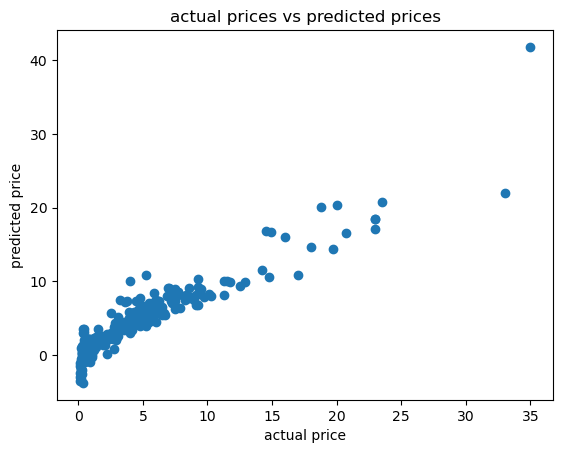

In [17]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual prices vs predicted prices")
plt.show()

### Performance Metrics

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate errors
mae = mean_absolute_error(y_train, training_data_prediction)
mse = mean_squared_error(y_train, training_data_prediction)
rmse = np.sqrt(mse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 1.2166174093912068
Mean Squared Error (MSE): 3.2590308233091037
Root Mean Squared Error (RMSE): 1.8052785999144574


### Example :-  Making prediction on new data

In [29]:
input_data={
    "Year":2017,
    "Present_Price":[9.2],
    "Kms_Driven":[40000],
    "Fuel_Type":[1],
    "Seller_Type":[1],
    "Transmission":[1],
    "Owner":[0]
}
input_df=pd.DataFrame(input_data)
predicted_price=lin_reg_model.predict(input_df)
print("Predicted Selling Price :",predicted_price[0])


Predicted Selling Price : 8.82987037837131
